In [1]:
import pandas as pd
# import pickle5 as pickle
import importlib
import math
import matplotlib.pyplot as plt
import re
from rouge import Rouge

In [2]:
import dsci_2022
from dsci_2022.utils import *

In [3]:
# with open("../data/labels.pkl", "rb") as file:
#     labels = pickle.load(file)
    
# show(labels)

In [4]:
labels = pd.read_pickle("../data/labels.pkl")
show(labels)

(372564, 5)


,paper_id,sentence,text,sentence_score,in_summary
0,0,0,Proceedings of the 56th Annual Meeting of the ...,NaN,False
1,0,1,Parsing has been useful for incorporating ling...,NaN,False
2,0,2,Neural network-based approaches relying on den...,NaN,False
3,0,3,"Generally speaking, either these approaches pr...",NaN,False
4,0,4,Corresponding authors: yikang.shen@umontreal.c...,NaN,False


In [5]:
example_raw = labels.query("paper_id == 0")\
.sort_values("sentence")\
.text.map(lambda x: re.sub(r"\s", " ", x) + " ").sum()
print(example_raw)

Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Long Papers), pages 1171–1180 Melbourne, Australia, July 15 - 20, 2018. c©2018 Association for Computational Linguistics 1171 Devising fast and accurate constituency parsing algorithms is an important, long-standing problem in natural language processing. Parsing has been useful for incorporating linguistic prior in several related tasks, such as relation extraction, paraphrase detection (Callison-Burch, 2008), and more recently, natural language inference (Bowman et al., 2016) and machine translation (Eriguchi et al., 2017). Neural network-based approaches relying on dense input representations have recently achieved competitive results for constituency parsing (Vinyals et al., 2015; Cross and Huang, 2016; Liu and Zhang, 2017b; Stern et al., 2017a). Generally speaking, either these approaches produce the parse tree sequentially, by governing ∗Equal contribution. Corresponding authors: yikang.shen@

3635


[('Proceedings', 0.5),
 ('of', 0.5086421904134987),
 ('the', 0.5172817987813012),
 ('56th', 0.5259162438291546),
 ('Annual', 0.534542945825462),
 ('Meeting', 0.5431593273520349),
 ('of', 0.5517628140741532),
 ('the', 0.5603508355097054),
 ('Association', 0.5689208257971765),
 ('for', 0.5774702244622562)]

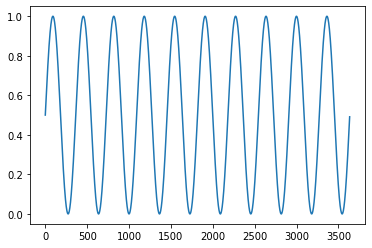

In [6]:
example = [
    (w, 0.5 + math.sin(10 * 2 * math.pi * i / len(example_raw.split(" "))) / 2) 
    for i, w in enumerate(example_raw.split(" "))
]
print(len(example))
plt.plot([s for w, s in example])
example[:10]

In [7]:
importlib.reload(dsci_2022.utils)
spans = dsci_2022.utils.extract_spans(example, 0.8)
print([len(l) for l in spans])
spans[0][:10]

[108, 109, 108, 109, 108, 109, 108, 109, 108, 109]


[('important,', 0.805308384784835),
 ('long-standing', 0.8121067532766586),
 ('problem', 0.8188118729669054),
 ('in', 0.8254217405526382),
 ('natural', 0.8319343811895946),
 ('language', 0.8383478490822156),
 ('processing.', 0.8446602280649946),
 ('Parsing', 0.8508696321749751),
 ('has', 0.8569742062152228),
 ('been', 0.8629721263091079)]

In [8]:
# importlib.reload(dsci_2022.utils)
# summary = dsci_2022.utils.produce_summary(
#     spans, 
#     summary_separator = "\n\n"
# #     summary_separator = "\n---\n"
# )
# print(summary)

In [9]:
# ref_1 = summary
# hyp_1 = "\n\n".join(summary.split("\n\n")[:-1])
# ref_2 = "\n\n".join(summary.split("\n\n")[1:])
# hyp_2 = "\n\n".join(summary.split("\n\n")[1:-1])

# refs = [ref_1, ref_2]
# hyps = [hyp_1, hyp_2]

# [len(s) for s in refs], [len(s) for s in hyps]

In [10]:
rouge = Rouge()
# scores = rouge.get_scores(hyps = hyps, refs = refs)
# scores

In [11]:
# importlib.reload(dsci_2022)
# importlib.reload(dsci_2022.metrics)

# results = dsci_2022.metrics.compute_rouge(refs, hyps)
# results

In [12]:
# results.groupby("metric").mean()

# evaluate_summary

In [13]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('../resources/checkpoints/bert-base-uncased-tokenizer.pt')

In [14]:
example_raw = labels.query("paper_id == 0")\
.sort_values("sentence")\
.text.sum()
example_raw

'Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Long Papers), pages 1171–1180 Melbourne, Australia, July 15 - 20, 2018. c©2018 Association for Computational Linguistics\n1171\nDevising fast and accurate constituency parsing algorithms is an important, long-standing problem in natural language processing.Parsing has been useful for incorporating linguistic prior in several related tasks, such as relation extraction, paraphrase detection (Callison-Burch, 2008), and more recently, natural language inference (Bowman et al., 2016) and machine translation (Eriguchi et al., 2017).Neural network-based approaches relying on dense input representations have recently achieved competitive results for constituency parsing (Vinyals et al., 2015; Cross and Huang, 2016; Liu and Zhang, 2017b; Stern et al., 2017a).Generally speaking, either these approaches produce the parse tree sequentially, by governing\n∗Equal contribution.Corresponding authors: yikang.shen@

In [15]:
tokens = tokenizer(example_raw)["input_ids"]
print(len(tokens))
tokens[:5]

Token indices sequence length is longer than the specified maximum sequence length for this model (5353 > 512). Running this sequence through the model will result in indexing errors


5353


[101, 8931, 1997, 1996, 29087]

5353


[(101, 0.5),
 (8931, 0.5017606498194529),
 (1997, 0.5035212778075707),
 (1996, 0.5052818621332889),
 (29087, 0.5070423809660843),
 (3296, 0.508802812476246),
 (3116, 0.5105631348351459),
 (1997, 0.5123233262155091),
 (1996, 0.5140833647916849),
 (2523, 0.5158432287399174)]

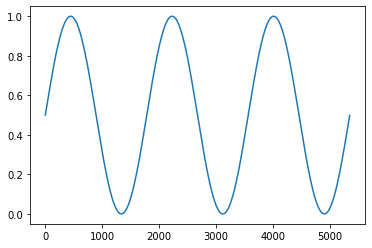

In [16]:
example_1 = [
    (w, 0.5 + math.sin(3 * 2 * math.pi * i / len(tokens)) / 2) 
    for i, w in enumerate(tokens)
]
print(len(example_1))
plt.plot([s for w, s in example_1])
example_1[:10]

5353


[(101, 0.5),
 (8931, 0.5058687100992418),
 (1997, 0.5117366116558576),
 (1996, 0.5176028962386158),
 (29087, 0.523466755639058),
 (3296, 0.5293273819828477),
 (3116, 0.5351839678410721),
 (1997, 0.5410357063414837),
 (1996, 0.5468817912796636),
 (2523, 0.5527214172300946)]

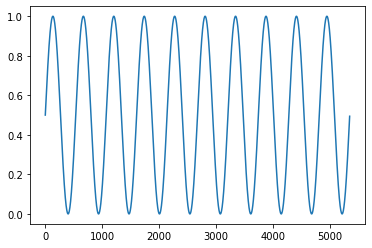

In [17]:
example_2 = [
    (w, 0.5 + math.sin(10 * 2 * math.pi * i / len(tokens)) / 2) 
    for i, w in enumerate(tokens)
]
print(len(example_2))
plt.plot([s for w, s in example_2])
example_2[:10]

In [18]:
full_example = [
    (t1[0], t1[1] > 0.5, t2[1]) for t1, t2 in zip(example_1, example_2)
]
full_example[:5]

[(101, False, 0.5),
 (8931, True, 0.5058687100992418),
 (1997, True, 0.5117366116558576),
 (1996, True, 0.5176028962386158),
 (29087, True, 0.523466755639058)]

In [19]:
t, r, p = zip(*full_example)
print(t[:5])
print(r[:5])
print(p[:5])

(101, 8931, 1997, 1996, 29087)
(False, True, True, True, True)
(0.5, 0.5058687100992418, 0.5117366116558576, 0.5176028962386158, 0.523466755639058)


In [20]:
t1 = [100, 2000, 10000,  0, 2000, 2000, 2000]
r1 = [False, True, True, False, True, True, True]
p1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.6, 0.6]

In [21]:
t2 = [100, 2000, 10000,  0, 2000, 2000, 2000]
r2 = [False, False, False, False, True, True, True]
p2 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [22]:
importlib.reload(dsci_2022.utils)
importlib.reload(dsci_2022.metrics)

d1 = dsci_2022.utils.detokenize(
    t1, r1, p1, 
    tokenizer, 
    threshold = 0.50001
)

d2 = dsci_2022.utils.detokenize(
    t2, r2, p2, 
    tokenizer, 
    threshold = 0.50001
)

# print(d1)
# print(d2)

dsci_2022.metrics.compute_rouge([d1[0], d2[0], d1[0]], [d1[1], d2[1], d1[0]])

scores {'rouge-1': {'r': 0.75, 'p': 1.0, 'f': 0.8333333286111111}, 'rouge-2': {'r': 0.6666666666666666, 'p': 1.0, 'f': 0.7499999956250001}, 'rouge-l': {'r': 0.75, 'p': 1.0, 'f': 0.8333333286111111}}


{'rouge-1': {'r': 0.75, 'p': 1.0, 'f': 0.8333333286111111},
 'rouge-2': {'r': 0.6666666666666666, 'p': 1.0, 'f': 0.7499999956250001},
 'rouge-l': {'r': 0.75, 'p': 1.0, 'f': 0.8333333286111111}}

In [24]:
tokenizer.decode([100, 0, 2000, 2000])

'[UNK] [PAD] to to'

In [25]:
tokenizer.decode(t)

'[CLS] proceedings of the 56th annual meeting of the association for computational linguistics ( long papers ), pages 1171 – 1180 melbourne, australia, july 15 - 20, 2018. c©2018 association for computational linguistics 1171 devising fast and accurate constituency parsing algorithms is an important, long - standing problem in natural language processing. parsing has been useful for incorporating linguistic prior in several related tasks, such as relation extraction, paraphrase detection ( callison - burch, 2008 ), and more recently, natural language inference ( bowman et al., 2016 ) and machine translation ( eriguchi et al., 2017 ). neural network - based approaches relying on dense input representations have recently achieved competitive results for constituency parsing ( vinyals et al., 2015 ; cross and huang, 2016 ; liu and zhang, 2017b ; stern et al., 2017a ). generally speaking, either these approaches produce the parse tree sequentially, by governing ∗equal contribution. corresp